 ### Punkt 3
Zeige für 5 ausgewählte Variablen (diese sind frei von dir aus dem verkleinerten Datensatz mit den signifikanten Variablen zu wählen) eine vollständige Hypothesenauswertung mit allen in der Vorlesung festgehaltenen Schritten. Als Tipp für die Dokumentation: Ein vollständiger Output in Python kann hier wunderbar als Begleitmittel für die
anstehende Präsentation dienen. Das Hypothesenpaar und das Fazit aus dem Test
können die Folie abrunden. Aber präsentiert nicht einfach Eure Notebooks!


Hypothesenanalyse für 'Lebenszufriedenheit':
Nullhypothese (H0): Die Variable hat keinen signifikanten Einfluss auf die Lebenszufriedenheit.
Alternativhypothese (H1): Die Variable hat einen signifikanten Einfluss auf die Lebenszufriedenheit.
Testname: Pearson-Korrelation
Pearson-Korrelationskoeffizient: 1.0000
P-Wert: 0.0000
Fazit: Die Nullhypothese wird abgelehnt. Die Variable hat einen signifikanten Einfluss auf die Lebenszufriedenheit.


Hypothesenanalyse für 'Zufriedenheit_mit_Gesundheit':
Nullhypothese (H0): Die Variable hat keinen signifikanten Einfluss auf die Lebenszufriedenheit.
Alternativhypothese (H1): Die Variable hat einen signifikanten Einfluss auf die Lebenszufriedenheit.
Testname: Pearson-Korrelation
Pearson-Korrelationskoeffizient: 0.0810
P-Wert: 0.0233
Fazit: Die Nullhypothese wird abgelehnt. Die Variable hat einen signifikanten Einfluss auf die Lebenszufriedenheit.


Hypothesenanalyse für 'Besuch_Wirtschaftsmathematik':
Nullhypothese (H0): Die Variable hat keinen sig

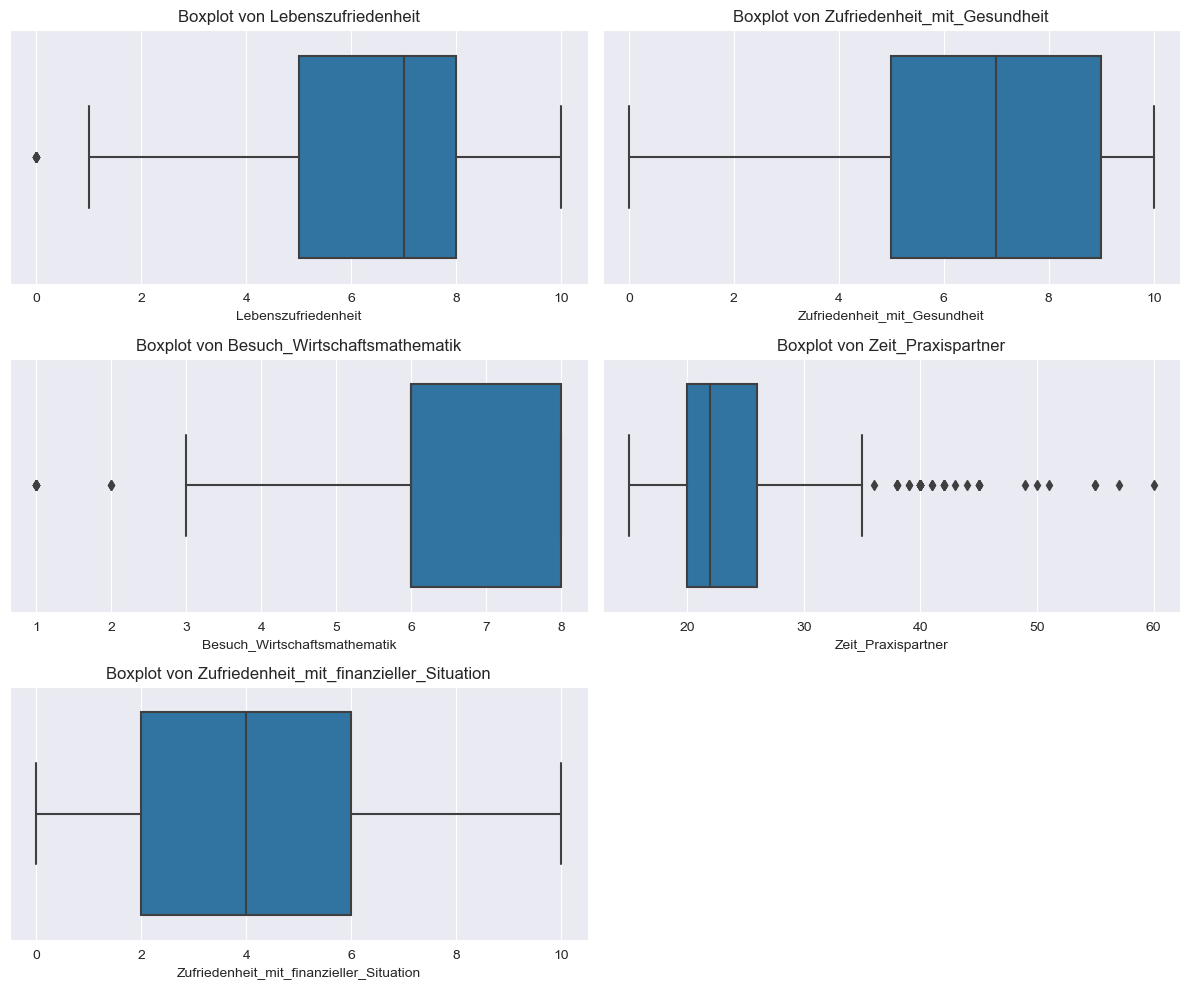

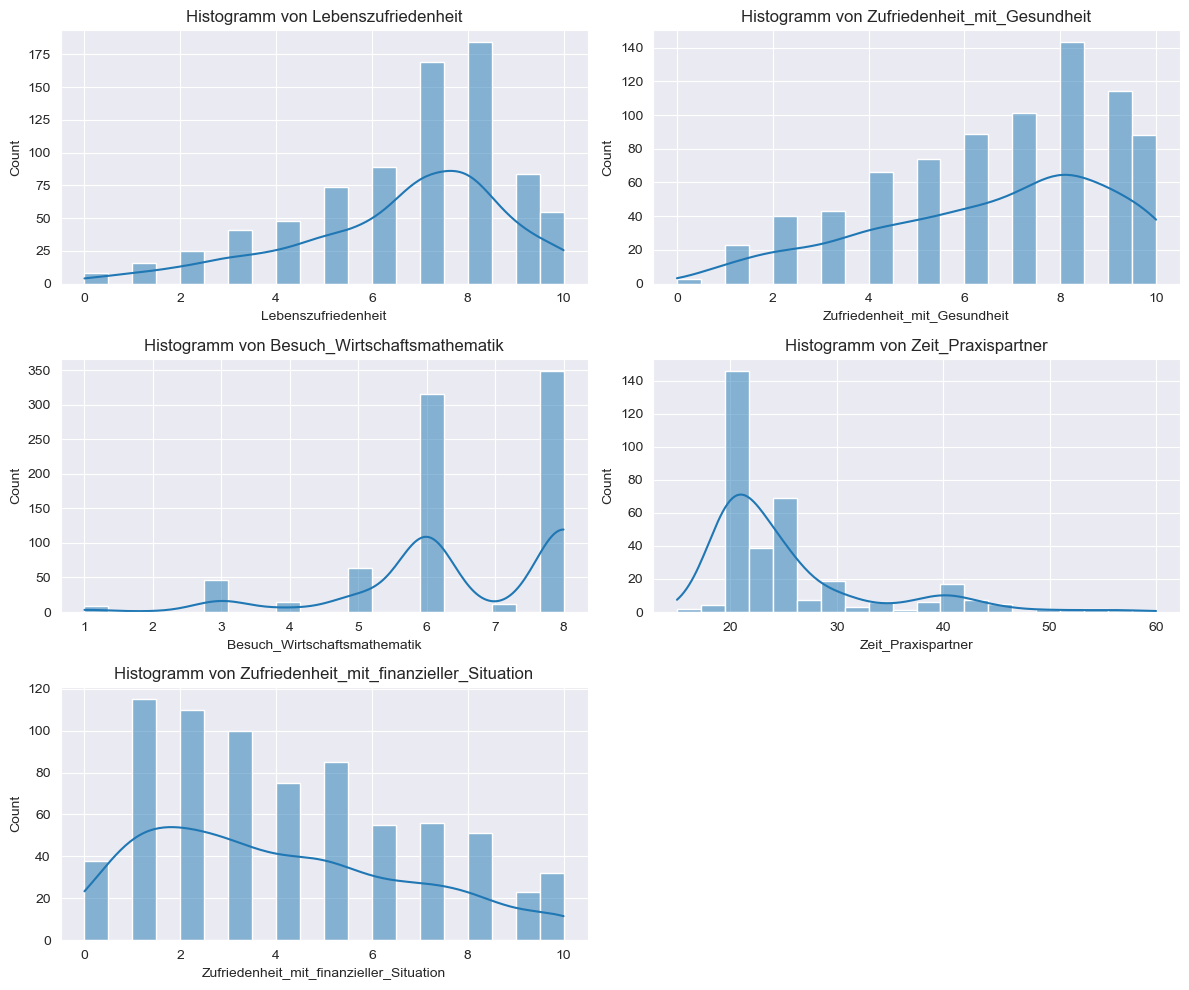

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import make_uni_df

# Read the data
uni_df = make_uni_df.get_dummied_df()

columns_list = uni_df.columns
columns_without_spaces = [column_name.replace(" ","_").replace("-","_").replace(".","") for column_name in columns_list]
uni_df.columns = columns_without_spaces
uni_df = uni_df[['Lebenszufriedenheit','Zufriedenheit_mit_Gesundheit','Besuch_Wirtschaftsmathematik','Zeit_Praxispartner','Zufriedenheit_mit_finanzieller_Situation']]
abhängige_variable = 'Lebenszufriedenheit'
ausgewählte_variablen = list(uni_df.columns)


def hypothesenanalyse(x, y, variablen_name):
    if pd.api.types.is_numeric_dtype(x):
        korrelation, p_wert = stats.pearsonr(x, y)
        test_name = 'Pearson-Korrelation'
    elif pd.api.types.is_categorical_dtype(x):
        kontingenztabelle = pd.crosstab(x, y)
        chi2, p_wert, _, _ = stats.chi2_contingency(kontingenztabelle)
        test_name = 'Chi-Quadrat-Test'
    else:
        return None, None, None

    return korrelation, p_wert, test_name


for spalte in ausgewählte_variablen:
    x = uni_df[spalte].replace([np.inf, -np.inf], np.nan).dropna()
    y = uni_df[abhängige_variable].replace([np.inf, -np.inf], np.nan).dropna()

    # Überprüfe und entferne fehlende Werte aus x und y
    x, y = x.dropna(), y.dropna()

    # Stelle sicher, dass x und y die gleiche Länge haben
    min_länge = min(len(x), len(y))
    x, y = x.iloc[:min_länge], y.iloc[:min_länge]

    korrelation, p_wert, test_name = hypothesenanalyse(x, y, spalte)
    if korrelation is not None and p_wert is not None:
        print(f"Hypothesenanalyse für '{spalte}':")
        print("Nullhypothese (H0): Die Variable hat keinen signifikanten Einfluss auf die Lebenszufriedenheit.")
        print("Alternativhypothese (H1): Die Variable hat einen signifikanten Einfluss auf die Lebenszufriedenheit.")
        print(f"Testname: {test_name}")
        print(f"Pearson-Korrelationskoeffizient: {korrelation:.4f}")
        print(f"P-Wert: {p_wert:.4f}")

        if p_wert < 0.05:
            print("Fazit: Die Nullhypothese wird abgelehnt. Die Variable hat einen signifikanten Einfluss auf die Lebenszufriedenheit.")
        else:
            print("Fazit: Die Nullhypothese kann nicht abgelehnt werden. Die Variable hat keinen signifikanten Einfluss auf die Lebenszufriedenheit.")
        print("\n")

deskriptive_statistiken = uni_df[ausgewählte_variablen].describe()
print("Deskriptive Statistiken:")
print(deskriptive_statistiken)

plt.figure(figsize=(12, 10))  # Updated figure size to accommodate all five subplots
for i, variable in enumerate(ausgewählte_variablen):
    plt.subplot(3, 2, i+1)  # Updated to 3x2 grid of subplots
    print('Variable:',variable)
    sns.boxplot(x=variable, data=uni_df)
    plt.title(f"Boxplot von {variable}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))  # Updated figure size to accommodate all five subplots
for i, variable in enumerate(ausgewählte_variablen):
    plt.subplot(3, 2, i+1)  # Updated to 3x2 grid of subplots
    sns.histplot(uni_df[variable], bins=20, kde=True)
    plt.title(f"Histogramm von {variable}")
plt.tight_layout()
plt.show()
